In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Reading 1000m ensemble

In [2]:
file_name = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/ensemble_jan4_23_1000'
df = pd.read_csv(file_name, skiprows=32, header=None, delim_whitespace=True) 
cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}


# converting year to 4 digits
df.iloc[:,2] = df.iloc[:,2] + 1900


In [3]:
df.head()

0   1     2   3   4   5   6   7    8      9        10      11     12
0   1   1  1998   1   4  23  15   0  0.0  74.91 -149.431  1000.0  883.9
1   2   1  1998   1   4  23  15   0  0.0  74.91 -149.431  1000.0  882.5
2   3   1  1998   1   4  23  15   0  0.0  74.91 -149.431  1000.0  885.5
3   4   1  1998   1   4  23  15   0  0.0  74.91 -149.431  1000.0  883.7
4   5   1  1998   1   4  23  15   0  0.0  74.91 -149.431  1000.0  882.4

In [4]:

# df_subset is used to merge yy, mm, dd, hh values into BT_time column
df_subset = df.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
dt_series = pd.to_datetime(df_subset)
dt_series.head()
# adding a new backtrajectory column
df['BT_time'] = dt_series
    


In [5]:
dt_series.head()

0   1998-01-04 23:15:00
1   1998-01-04 23:15:00
2   1998-01-04 23:15:00
3   1998-01-04 23:15:00
4   1998-01-04 23:15:00
dtype: datetime64[ns]

In [6]:
df_subset.head()

year  month  day  hour  minute
0  1998      1    4    23      15
1  1998      1    4    23      15
2  1998      1    4    23      15
3  1998      1    4    23      15
4  1998      1    4    23      15

In [7]:
# dropping the not required columns
df.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
df.head()
    
col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
df.rename(columns=col_rename2, inplace=True)

del df_subset
del dt_series

In [8]:
df.head()

ensemble member  back_hr    Lat      Lon     AGL  Pressure  \
0                1      0.0  74.91 -149.431  1000.0     883.9   
1                2      0.0  74.91 -149.431  1000.0     882.5   
2                3      0.0  74.91 -149.431  1000.0     885.5   
3                4      0.0  74.91 -149.431  1000.0     883.7   
4                5      0.0  74.91 -149.431  1000.0     882.4   

              BT_time  
0 1998-01-04 23:15:00  
1 1998-01-04 23:15:00  
2 1998-01-04 23:15:00  
3 1998-01-04 23:15:00  
4 1998-01-04 23:15:00

## Groupby ensemble member

In [19]:
# grouping the trajectories by ensemble member number
# use list to view the groupby object
list(df.groupby(by='ensemble member'))

[(1,       ensemble member  back_hr     Lat      Lon     AGL  Pressure  \
  0                   1      0.0  74.910 -149.431  1000.0     883.9   
  27                  1     -0.2  74.948 -149.740   996.0     884.3   
  54                  1     -1.2  75.116 -150.999   984.6     885.5   
  81                  1     -2.2  75.306 -152.291   979.0     886.0   
  108                 1     -3.2  75.509 -153.630   976.8     886.1   
  135                 1     -4.2  75.721 -155.043   979.9     885.6   
  162                 1     -5.2  75.939 -156.537   991.8     883.9   
  189                 1     -6.2  76.169 -157.985  1005.4     882.1   
  216                 1     -7.2  76.415 -159.285  1012.8     881.3   
  243                 1     -8.2  76.679 -160.442  1012.8     881.5   
  270                 1     -9.2  76.961 -161.473  1009.2     882.2   
  297                 1    -10.2  77.260 -162.432  1004.3     883.0   
  324                 1    -11.2  77.579 -163.357   995.9     884.2   
  3

In [13]:
test = df.groupby(by='ensemble member')

In [16]:
mean_df = df.groupby(by='ensemble member').mean()

In [18]:
mean_df

back_hr        Lat        Lon          AGL    Pressure
ensemble member                                                          
1               -59.206612  74.242669 -40.444430   939.404132  888.633884
2               -59.206612  75.792777 -33.675174   722.460331  914.964463
3               -59.206612  76.761058 -38.776000  1429.095868  837.519008
4               -59.206612  74.167347 -41.170413   914.223140  892.474380
5               -59.206612  75.820107 -34.440901   722.629752  916.353719
6               -59.206612  75.359207 -41.317033  1330.247934  848.234711
7               -59.206612  74.231413 -39.480603   976.043802  883.372727
8               -59.206612  75.710405 -32.965603   744.233058  909.451240
9               -59.206612  79.384215 -40.772769  1180.785124  866.418182
10              -59.206612  81.219521 -16.024926  1480.672727  859.875207
11              -59.206612  79.012397 -40.377198   921.247934  925.775207
12              -59.206612  79.392620 -18.473298   827.829752  938.136364
13              -59.206612  81.371074 -16.736959  1482.813223  859.790909
14              -59.206612  78.959901 -42.648165   943.090909  921.634711
15              -59.206612  79.564017 -19.200661   825.902479  938.191736
16              -59.206612  80.200702 -13.011388  1166.514876  896.000000
17              -59.206612  79.054744 -39.261612   943.750413  923.495041
18              -59.206612  79.179802 -17.525240   828.437190  938.305785
19              -59.206612  74.221231 -47.713711  1086.879339  841.635537
20              -59.206612  70.932008 -48.975430  2166.223140  718.442149
21              -59.206612  74.833909 -41.652306   907.033058  862.000826
22              -59.206612  74.104926 -48.776711  1110.570248  838.880992
23              -59.206612  70.843479 -49.628868  2161.421488  719.882645
24              -59.206612  75.008612 -44.555025   882.461157  864.907438
25              -59.206612  74.444405 -46.460339  1009.180992  850.044628
26              -59.206612  70.965661 -48.296711  2147.725620  719.729752
27              -59.206612  75.126306 -38.390628  1184.597521  835.561983

In [20]:
# this is the mean by each ensemble member(total 27 members), that is, the average position of
# each trajectory. 
# Instead, we want mean between different ensemble members

## Ensemble mean

In [9]:
# grouping by back hour sorts the ensemble members and taking the average gives mean of the ensemble members
df_mean_1000 = df.groupby(df['back_hr']).mean()
df_mean_1000.head()

ensemble member        Lat       Lon          AGL    Pressure
back_hr                                                               
-119.2                14  65.559111  7.343593  1624.685185  813.670370
-118.2                14  65.661333  7.794333  1602.651852  817.540741
-117.2                14  65.761852  8.240630  1572.996296  822.014815
-116.2                14  65.855222  8.679889  1540.074074  826.503704
-115.2                14  65.944222  9.112074  1505.625926  830.825926

In [24]:
test_2.describe()

ensemble member         Lat         Lon          AGL    Pressure
count            121.0  121.000000  121.000000   121.000000  121.000000
mean              14.0   76.292760  -36.324152  1149.462045  867.026416
std                0.0    6.290357   73.916702   194.937955   23.399058
min               14.0   65.559111 -166.524185   754.100000  813.670370
25%               14.0   71.252593 -121.848963   965.722222  851.888889
50%               14.0   76.895333    6.445630  1239.485185  856.003704
75%               14.0   80.608519   15.109667  1281.096296  887.266667
max               14.0   87.788963   19.857296  1624.685185  919.259259

## Descriptive statistics by group

In [28]:
# Example statistics done for the lat column
df['Lat'].groupby(df['back_hr']).describe() # shows mean etc at each point

count       mean           std     min      25%     50%      75%  \
back_hr                                                                     
-119.2    27.0  65.559111  9.510658e+00  55.043  56.9020  65.128  72.8540   
-118.2    27.0  65.661333  9.455304e+00  55.097  57.0785  65.338  72.8605   
-117.2    27.0  65.761852  9.399709e+00  55.093  57.2415  65.549  72.8590   
-116.2    27.0  65.855222  9.348468e+00  55.014  57.4000  65.760  72.8630   
-115.2    27.0  65.944222  9.300442e+00  54.907  57.6070  65.973  72.8730   
-114.2    27.0  66.038148  9.247484e+00  54.857  57.8710  66.186  72.8950   
-113.2    27.0  66.145704  9.178118e+00  54.905  58.1655  66.402  72.9825   
-112.2    27.0  66.269000  9.089053e+00  55.036  58.4085  66.621  73.0700   
-111.2    27.0  66.398519  8.992131e+00  55.169  58.6345  66.841  73.1620   
-110.2    27.0  66.523667  8.900386e+00  55.241  58.8520  67.057  73.2595   
-109.2    27.0  66.639926  8.819109e+00  55.248  59.0570  67.267  73.3640   
-108.2    27.0  66.751222  8.745106e+00  55.259  59.2530  67.470  73.4760   
-107.2    27.0  66.867778  8.667081e+00  55.353  59.4415  67.664  73.6000   
-106.2    27.0  67.000333  8.571607e+00  55.473  59.6660  67.854  73.7350   
-105.2    27.0  67.148556  8.460394e+00  55.673  59.9285  68.051  73.8815   
-104.2    27.0  67.308889  8.342616e+00  55.928  60.2095  68.256  74.0440   
-103.2    27.0  67.480519  8.222804e+00  56.181  60.5180  68.469  74.2280   
-102.2    27.0  67.663630  8.101241e+00  56.407  60.8645  68.686  74.4830   
-101.2    27.0  67.860481  7.976201e+00  56.608  61.2490  68.907  74.7830   
-100.2    27.0  68.070556  7.840376e+00  56.829  61.6610  69.137  74.9875   
-99.2     27.0  68.292667  7.687633e+00  57.099  62.0950  69.382  75.1770   
-98.2     27.0  68.527778  7.522504e+00  57.383  62.5505  69.634  75.3530   
-97.2     27.0  68.778111  7.349674e+00  57.677  63.0360  69.886  75.5275   
-96.2     27.0  69.045630  7.171726e+00  57.981  63.5615  69.959  75.7105   
-95.2     27.0  69.335889  6.987904e+00  58.298  64.1375  70.019  75.7400   
-94.2     27.0  69.643111  6.799727e+00  58.636  64.7455  70.075  75.9250   
-93.2     27.0  69.956037  6.610263e+00  59.004  65.3665  70.129  76.1500   
-92.2     27.0  70.271222  6.422868e+00  59.395  65.9755  70.185  76.3725   
-91.2     27.0  70.590667  6.237122e+00  59.805  66.5780  70.244  76.5940   
-90.2     27.0  70.919000  6.051400e+00  60.228  67.0935  70.308  76.8160   
...        ...        ...           ...     ...      ...     ...      ...   
-28.2     27.0  86.912481  9.235525e-01  85.019  86.2410  87.133  87.3725   
-27.2     27.0  86.271926  1.018279e+00  84.313  85.4340  86.415  87.0380   
-26.2     27.0  85.570852  1.071214e+00  83.649  84.6680  85.635  86.3880   
-25.2     27.0  84.850667  1.075524e+00  83.031  83.9440  84.870  85.6495   
-24.2     27.0  84.134000  1.041754e+00  82.455  83.2630  84.087  84.8775   
-23.2     27.0  83.434185  9.767326e-01  81.921  82.6310  83.385  84.0930   
-22.2     27.0  82.771185  8.965847e-01  81.421  82.0700  82.749  83.3325   
-21.2     27.0  82.152407  8.176659e-01  80.945  81.5420  82.140  82.6310   
-20.2     27.0  81.571667  7.443622e-01  80.493  81.0170  81.559  81.9860   
-19.2     27.0  81.023296  6.768379e-01  80.065  80.5140  81.009  81.3850   
-18.2     27.0  80.501741  6.115015e-01  79.661  80.0490  80.486  80.8145   
-17.2     27.0  80.005333  5.447998e-01  79.280  79.6040  79.988  80.2680   
-16.2     27.0  79.537074  4.793662e-01  78.918  79.1675  79.520  79.7515   
-15.2     27.0  79.097852  4.180492e-01  78.574  78.7605  79.083  79.2705   
-14.2     27.0  78.685185  3.629618e-01  78.244  78.3815  78.668  78.8210   
-13.2     27.0  78.296926  3.137656e-01  77.897  78.0335  78.263  78.4160   
-12.2     27.0  77.931222  2.696788e-01  77.560  77.6960  77.884  78.0350   
-11.2     27.0  77.587074  2.302051e-01  77.243  77.3820  77.535  77.6815   
-10.2     27.0  77.264185  1.953019e-01  76.947  77.0955  77.222  77.3610   
-9.2 

In [29]:
# Example statistics done for the lon column
df['Lon'].groupby(df['back_hr']).describe()

count        mean        std      min       25%      50%       75%  \
back_hr                                                                       
-119.2    27.0    7.343593  21.109540  -24.779  -15.7150   16.036   20.1850   
-118.2    27.0    7.794333  20.849232  -22.828  -15.2930   16.222   20.2865   
-117.2    27.0    8.240630  20.612256  -20.723  -14.8285   16.392   20.3705   
-116.2    27.0    8.679889  20.408601  -19.205  -14.3365   16.553   20.4370   
-115.2    27.0    9.112074  20.230199  -18.346  -13.8245   16.776   20.4840   
-114.2    27.0    9.528741  20.074756  -17.543  -13.2650   16.943   20.5060   
-113.2    27.0    9.933593  19.941674  -16.786  -12.4355   16.980   20.4950   
-112.2    27.0   10.350222  19.836001  -16.043  -11.6015   17.086   20.4755   
-111.2    27.0   10.786519  19.764056  -15.292  -10.8530   17.110   20.4745   
-110.2    27.0   11.235630  19.734099  -14.551  -10.1300   17.032   20.4880   
-109.2    27.0   11.695926  19.749379  -15.007   -9.4385   16.917   20.5135   
-108.2    27.0   12.158815  19.805148  -15.457   -8.8220   16.777   20.5495   
-107.2    27.0   12.620778  19.904304  -15.898   -8.5435   16.619   20.5930   
-106.2    27.0   13.074111  20.027215  -16.327   -8.2740   16.443   20.6375   
-105.2    27.0   13.507889  20.142875  -16.738   -7.9720   16.246   20.6975   
-104.2    27.0   13.924296  20.253069  -17.132   -7.2120   16.029   20.8370   
-103.2    27.0   14.329741  20.365647  -17.507   -6.4065   15.789   20.9790   
-102.2    27.0   14.725963  20.486697  -17.857   -5.5790   15.522   21.1200   
-101.2    27.0   15.109667  20.625518  -18.187   -4.7880   15.214   21.2535   
-100.2    27.0   15.485852  20.779998  -18.486   -4.0560   14.986   21.3950   
-99.2     27.0   15.858778  20.938364  -18.748   -3.3545   14.580   21.5620   
-98.2     27.0   16.228185  21.100601  -18.967   -2.6675   14.143   21.7585   
-97.2     27.0   16.587630  21.272706  -19.138   -2.0110   13.944   21.9900   
-96.2     27.0   16.935630  21.459560  -19.260   -1.4530   13.837   22.2595   
-95.2     27.0   17.268815  21.663140  -19.330   -1.0455   13.717   22.5725   
-94.2     27.0   17.587407  21.859358  -19.358   -0.6830   13.485   22.8885   
-93.2     27.0   17.889111  22.030460  -19.348   -0.2310   13.150   23.1625   
-92.2     27.0   18.176000  22.181543  -19.287    0.3070   12.799   23.3865   
-91.2     27.0   18.442111  22.323645  -19.162    0.7715   12.750   23.5510   
-90.2     27.0   18.691370  22.453907  -18.935    1.0695   12.931   23.6440   
...        ...         ...        ...      ...       ...      ...       ...   
-28.2     27.0 -137.362704  27.677480 -164.267 -158.1735 -147.465 -121.7365   
-27.2     27.0 -147.891111  19.373627 -165.407 -161.0355 -154.987 -143.0850   
-26.2     27.0 -154.751481  12.849926 -166.256 -163.0995 -159.505 -153.1325   
-25.2     27.0 -159.132667   8.456956 -166.905 -164.5455 -162.387 -157.7685   
-24.2     27.0 -161.904333   5.664597 -167.427 -165.4275 -164.156 -160.1160   
-23.2     27.0 -163.632556   3.975926 -167.871 -166.0260 -165.219 -161.5090   
-22.2     27.0 -164.781333   3.018164 -168.214 -166.6205 -165.904 -162.5490   
-21.2     27.0 -165.621185   2.414207 -168.410 -167.1345 -166.526 -163.4855   
-20.2     27.0 -166.192222   1.974744 -168.455 -167.4180 -167.042 -164.1225   
-19.2     27.0 -166.493407   1.632324 -168.327 -167.6345 -167.290 -164.6285   
-18.2     27.0 -166.524185   1.385703 -168.048 -167.6535 -167.172 -165.0825   
-17.2     27.0 -166.297259   1.247569 -167.647 -167.3205 -166.897 -165.0690   
-16.2     27.0 -165.928259   1.188366 -167.159 -166.8805 -166.528 -164.8610   
-15.2     27.0 -165.503037   1.148815 -166.678 -166.4700 -166.081 -164.6100   
-14.2     27.0 -165.003556   1.098858 -166.093 -165.8795 -165.592 -164.3090   
-13.2     27.0 -164.406815   1.035992 -165.523 -165.1345 -164.930 -163.9500   
-12.2     27.0 -163.697111   0.975950 -164.826 -164.3620 -164.145 -163.3380   
-11.2     27.0 -162.871593   0.932975 -163.957 -163.5455 -1

Defining a function to plot the ensemble member

## Function for plotting

In [10]:
from netCDF4 import Dataset
from netCDF4 import date2index
from datetime import datetime
def trajplot_ensemble(lat1, lon1, lat2, lon2, sea_ice='Yes', stations=None ,title=None, size=(12,10), pixel=100):
    
    """Plot the mean ensemble trajectories overlaying with single traj. Pass the lat, lon after applying groupby
    lat1, lon1 are for ensemble mean
    lat2, lon2 are for single traj"""
    
    # creating a basemap
    fig = plt.figure(figsize=size, dpi=pixel)
        # plt.figure(figsize=(10,8))
        
    m = Basemap(projection='ortho', lat_0=80, lon_0=270, resolution='l')
    
    m.drawcoastlines(color='0.75')
    m.fillcontinents(color='0.75')
    #m.drawparallels(np.arange(-80.,81.,10.), color='grey') # lat andd lons at 20 degrees
    #m.drawmeridians(np.arange(-180.,181.,20.)) # longittudes
    
    if (sea_ice == 'Yes' or sea_ice == 'Y'):    
        # Reading Sea Ice data
        filename_ = '/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc'
        ds = Dataset(filename_)
        
        # to get the time index out of the netcdf variable
        # change it according to the month you want to plot
        # Eg, dec here
        # timeindex gives you the index of in the netcdf file
        
        timeindex = date2index(datetime(1998,1,15),ds.variables['time'])
        lats_ice = ds.variables['latitude'][:]
        lons_ice = ds.variables['longitude'][:]
    
        #note that lon goes from 0 to 360
        # should we do a -180 here? No, basemap adjusts it automatically
        # creating our meshgrid according to data coordinates given

        lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
        # meshgrid creates a coordinate system with our axis supplied

        # getting seaice for SHEBA december as an eg but it works for all months
        sea_ice_dec = ds.variables['seaice_conc'][timeindex,:,:] # month dependent on user date
        # masking the low seaice concentration value
        # check low sea ice value by np.sea_ice_dec.mina
        # masking since min sea Ice is -1 for continents
        sea_ice_dec = np.ma.masked_where(sea_ice_dec<=0,sea_ice_dec) 
        ds.close()
        
        # plotting Sea Ice
        m.pcolormesh(lon_ice, lat_ice, sea_ice_dec, latlon=True, cmap='Blues')
        plt.clim(0, 100) # Set the color limits of the current image
        plt.colorbar(label='Sea Ice Concentration')
        

    
    #Plot the points on the map
    x1, y1 = m(lon1, lat1)
    x2, y2 = m(lon2, lat2)
    plt.plot(x1, y1, linewidth=1.0, color='red', label='ensemble mean')
    plt.plot(x2, y2, linewidth=1.0, color='g', label='single member' )
        
        
    #source point 
    xpt, ypt = m(lon1[-1], lat1[-1]) #marker at SHEBA
    plt.plot(xpt, ypt, marker = '*', markerfacecolor='#ffed00', linewidth=0, markersize=12)
        # Text
        
    
    if stations is not None:
        # plotting stations
        # Reading IGRA list
        df_IGRA = pd.read_excel('/home-nfs/ollie/muali/python_notebook_ollie/IGR_Above_25Lat.xlsx')
        df_IGRA2 = df_IGRA.loc[df_IGRA['Lat'] > 55.]
        station_lat = df_IGRA2['Lat'].values
        station_lon = df_IGRA2['Lon'].values
        station_x, station_y = m(station_lon, station_lat)
        m.scatter(station_x, station_y, marker = '*', c='#ffed00', s=45, linewidth=0.2, zorder=10)
    
    if title is not None:
        plt.title(title)
    plt.legend()

In [29]:
#trajplot_ensemble(lat=test_2['Lat'].values, lon=test_2['Lon'].values, stations='Y')

## Overlay plot

Overlaying the mean ensemble plot with one generating by normal method

In [11]:
# path to all trajectory files
file_1000= '/home/ollie/muali/Data/winter_all/tdump_1000_01_04_23'

In [12]:
df_1000 = pd.read_csv(file_1000, skiprows=7, header=None, delim_whitespace=True)
lat2_1000 = np.array(df_1000.iloc[:, 9].copy())
lon2_1000 = np.array(df_1000.iloc[:, 10].copy())
    

In [13]:
# lat1 is ensemble lats, lat2 is single traj lats
lat1_1000=df_mean_1000['Lat'].values
lon1_1000=df_mean_1000['Lon'].values


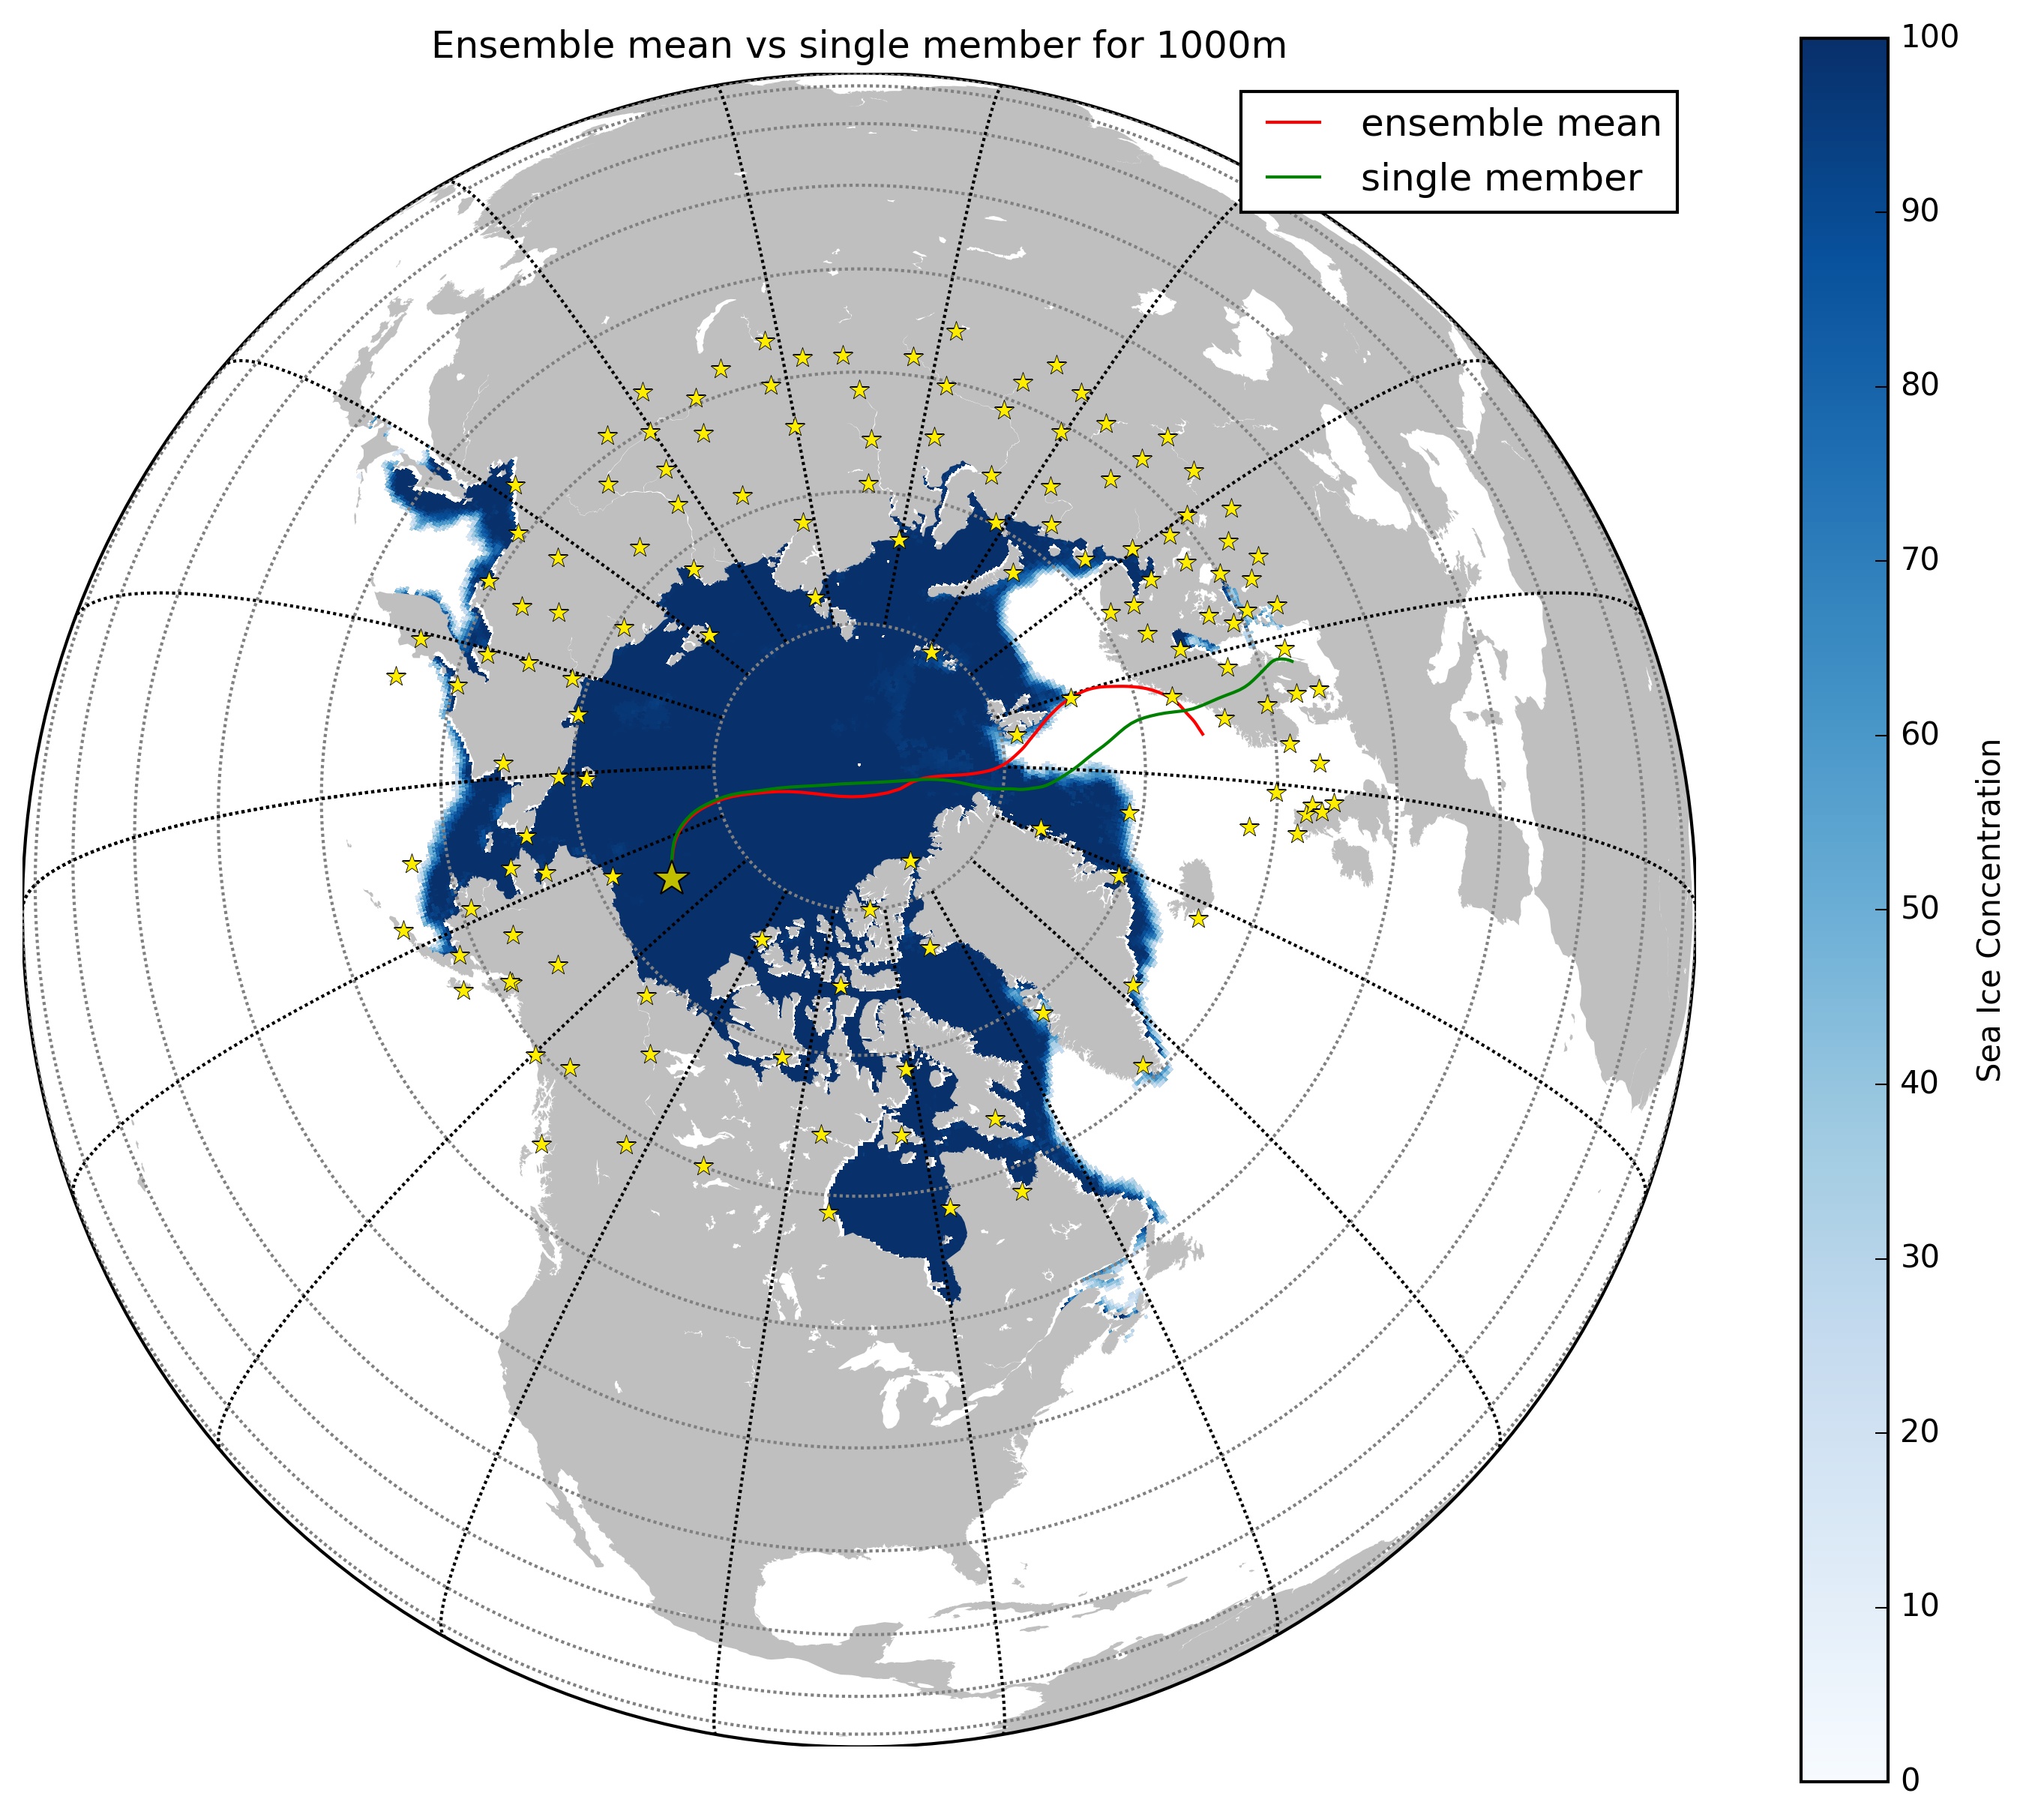

In [84]:
"""Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
fig = plt.figure(figsize=(12,10), dpi=300)
        # plt.figure(figsize=(10,8))
        
m = Basemap(projection='ortho', lat_0=80, lon_0=270, resolution='l')
    

m.fillcontinents(color='0.75')
m.drawparallels(np.arange(-80.,81.,10.), color='grey') # lat andd lons at 20 degrees
m.drawmeridians(np.arange(-180.,181.,20.)) # longittudes
   
# Reading Sea Ice data
filename_ = '/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc'
ds = Dataset(filename_)
        
# to get the time index out of the netcdf variable
# change it according to the month you want to plot
# Eg, dec here
# timeindex gives you the index of in the netcdf file
        
timeindex = date2index(datetime(1998,1,15),ds.variables['time'])
lats_ice = ds.variables['latitude'][:]
lons_ice = ds.variables['longitude'][:]
    
 #note that lon goes from 0 to 360
# should we do a -180 here? No, basemap adjusts it automatically
# creating our meshgrid according to data coordinates given

lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
# meshgrid creates a coordinate system with our axis supplied

# getting seaice for SHEBA december as an eg but it works for all months
sea_ice_dec = ds.variables['seaice_conc'][timeindex,:,:] # month dependent on user date
# masking the low seaice concentration value
# check low sea ice value by np.sea_ice_dec.mina
# masking since min sea Ice is -1 for continents
sea_ice_dec = np.ma.masked_where(sea_ice_dec<=0,sea_ice_dec) 
ds.close()
        
# plotting Sea Ice
m.pcolormesh(lon_ice, lat_ice, sea_ice_dec, latlon=True, cmap='Blues')
plt.clim(0, 100) # Set the color limits of the current image
plt.colorbar(label='Sea Ice Concentration')

    
#Plot the trajectories points on the map
x1, y1 = m(lon1_1000, lat1_1000)
x2, y2 = m(lon2_1000, lat2_1000)
plt.plot(x1, y1, linewidth=1.0, color='red', label='ensemble mean')
plt.plot(x2, y2, linewidth=1.0, color='g', label='single member' )
        
#source point 
xpt, ypt = m(lon1_1000[-1], lat1_1000[-1]) #marker at SHEBA
plt.plot(xpt, ypt, marker = '*', markerfacecolor='y', linewidth=0, markersize=12)

        
    

# Reading IGRA list to plot stations
df_IGRA = pd.read_excel('/home/ollie/muali/python_notebook_ollie/IGR_Above_25Lat.xlsx')
df_IGRA2 = df_IGRA.loc[df_IGRA['Lat'] > 55.]
station_lat = df_IGRA2['Lat'].values
station_lon = df_IGRA2['Lon'].values
station_x, station_y = m(station_lon, station_lat)
m.scatter(station_x, station_y, marker = '*', c='#ffed00', s=45, linewidth=0.2, zorder=10)

plt.legend()
plt.title('Ensemble mean vs single member for 1000m')
        

## Checking the function

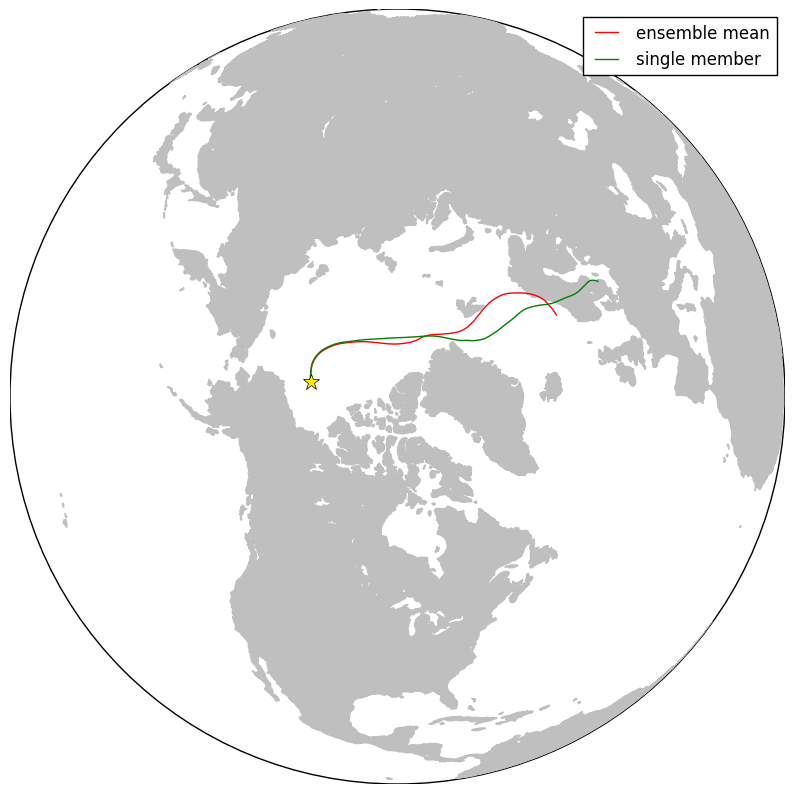

In [14]:
trajplot_ensemble(lat1_1000,lon1_1000, lat2_1000, lon2_1000, sea_ice='n')

# Reading 1400m ensemble

In [15]:
file_name2 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/ensemble_jan4_23_1400'

In [16]:
df2 = pd.read_csv(file_name2, skiprows=32, header=None, delim_whitespace=True) 

cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}
# converting year to 4 digits
df2.iloc[:,2] = df2.iloc[:,2] + 1900


# df_subset is used to merge yy, mm, dd, hh values into BT_time column
df_subset = df2.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
dt_series = pd.to_datetime(df_subset)
dt_series.head()
# adding a new backtrajectory column
df2['BT_time'] = dt_series

# dropping the not required columns
df2.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
df2.head()
    
col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
df2.rename(columns=col_rename2, inplace=True)

del df_subset
del dt_series

## grouping by 

In [17]:
# calculating mean trajectory from the ensemble members
df_mean_1400 = df2.groupby(df['back_hr']).mean()
df_mean_1400.head()

ensemble member  back_hr        Lat        Lon          AGL  \
back_hr                                                                
-119.2                14   -119.2  56.640111 -10.424370  1209.877778   
-118.2                14   -118.2  56.634111  -9.526926  1210.118519   
-117.2                14   -117.2  56.644519  -8.665630  1208.529630   
-116.2                14   -116.2  56.672926  -7.842037  1203.918519   
-115.2                14   -115.2  56.716889  -7.057333  1197.370370   

           Pressure  
back_hr              
-119.2   854.355556  
-118.2   854.729630  
-117.2   855.311111  
-116.2   856.211111  
-115.2   857.333333

## Overlaying

In [18]:
# path to all trajectory files
file_1400= '/home/ollie/muali/Data/winter_all/tdump_1400_01_04_23'
df_1400 = pd.read_csv(file_1400, skiprows=7, header=None, delim_whitespace=True)
lat2_1400 = np.array(df_1400.iloc[:, 9].copy())
lon2_1400 = np.array(df_1400.iloc[:, 10].copy())

In [19]:
# lat1 is ensemble mean lats, lat2 is single traj lats
lat1_1400_mean=df_mean_1400['Lat'].values
lon1_1400_mean=df_mean_1400['Lon'].values

NameError: name 'lon1' is not defined

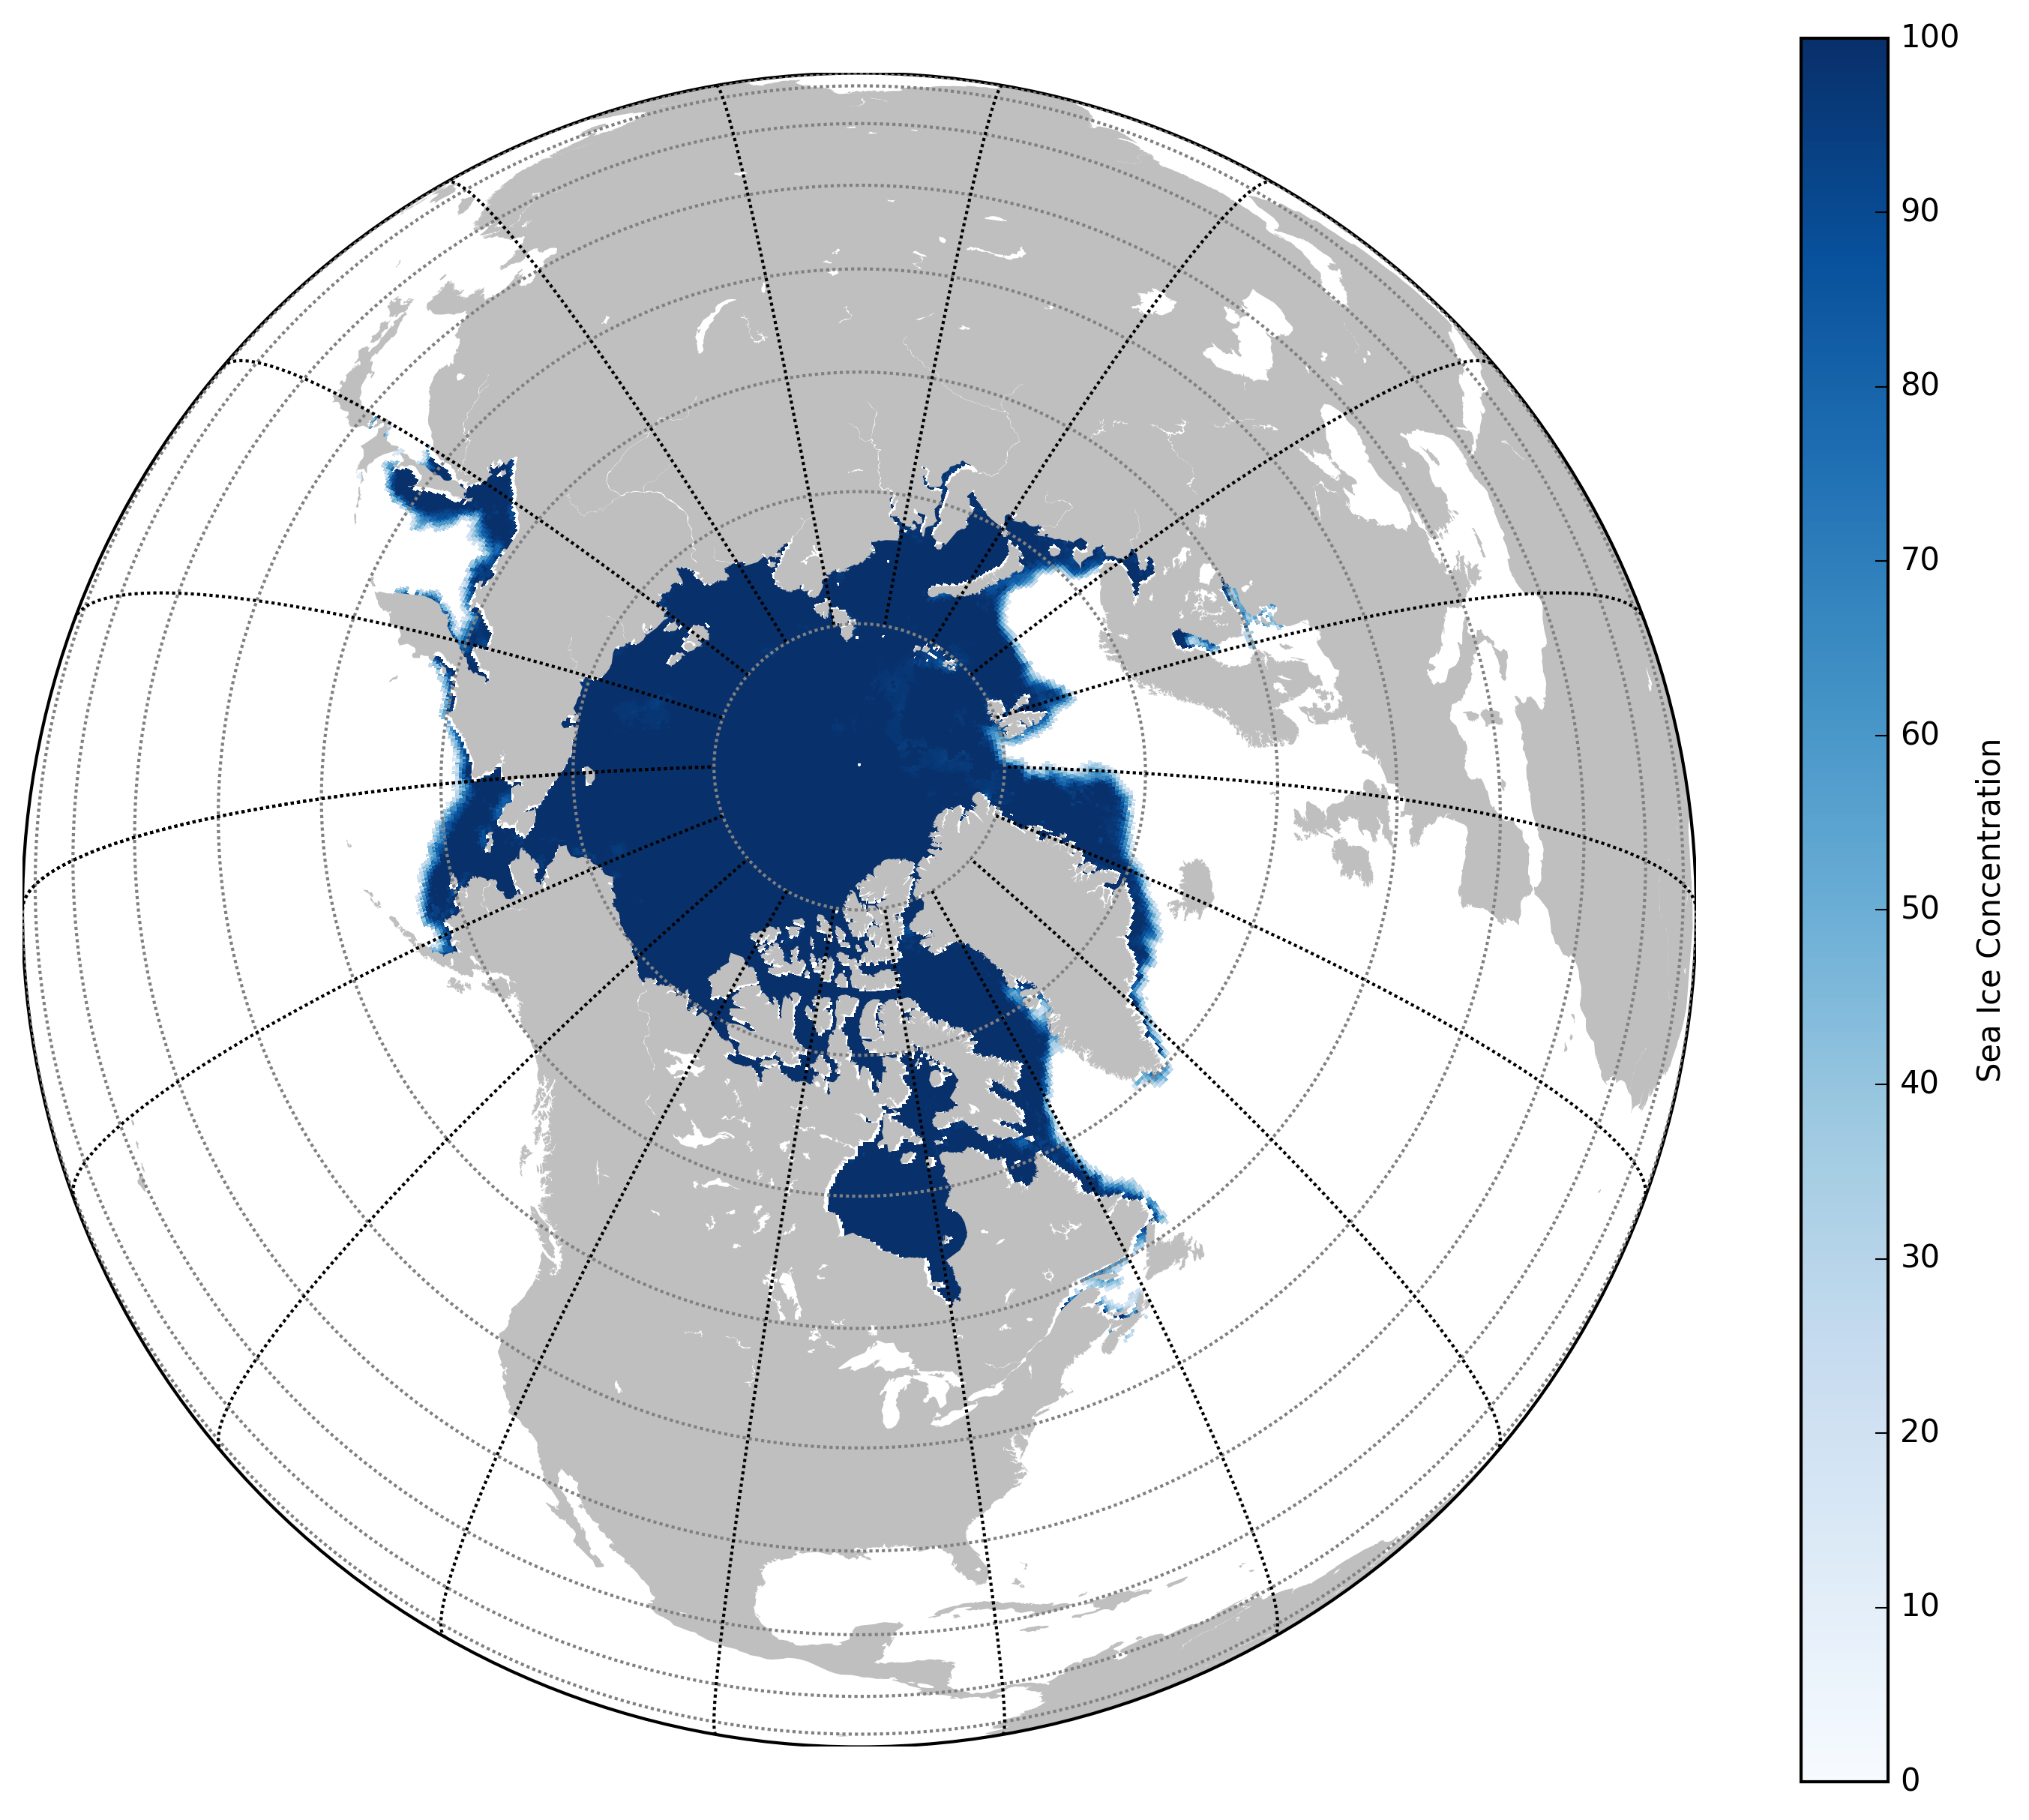

In [20]:
"""Plot the mean ensemble trajectories. Pass the lat, lon after applying groupby"""
fig = plt.figure(figsize=(12,10), dpi=300)
        # plt.figure(figsize=(10,8))
        
m = Basemap(projection='ortho', lat_0=80, lon_0=270, resolution='l')
    

m.fillcontinents(color='0.75')
m.drawparallels(np.arange(-80.,81.,10.), color='grey') # lat andd lons at 20 degrees
m.drawmeridians(np.arange(-180.,181.,20.)) # longittudes
   
# Reading Sea Ice data
filename_ = '/home/ollie/muali/Data/G10010_SeaIce/G10010_SIBT1850_v1.1.nc'
ds = Dataset(filename_)
        
# to get the time index out of the netcdf variable
# change it according to the month you want to plot
# Eg, dec here
# timeindex gives you the index of in the netcdf file
        
timeindex = date2index(datetime(1998,1,15),ds.variables['time'])
lats_ice = ds.variables['latitude'][:]
lons_ice = ds.variables['longitude'][:]
    
 #note that lon goes from 0 to 360
# should we do a -180 here? No, basemap adjusts it automatically
# creating our meshgrid according to data coordinates given

lon_ice, lat_ice = np.meshgrid(lons_ice, lats_ice)
# meshgrid creates a coordinate system with our axis supplied

# getting seaice for SHEBA december as an eg but it works for all months
sea_ice_dec = ds.variables['seaice_conc'][timeindex,:,:] # month dependent on user date
# masking the low seaice concentration value
# check low sea ice value by np.sea_ice_dec.mina
# masking since min sea Ice is -1 for continents
sea_ice_dec = np.ma.masked_where(sea_ice_dec<=0,sea_ice_dec) 
ds.close()
        
# plotting Sea Ice
m.pcolormesh(lon_ice, lat_ice, sea_ice_dec, latlon=True, cmap='Blues')
plt.clim(0, 100) # Set the color limits of the current image
plt.colorbar(label='Sea Ice Concentration')

    
#Plot the trajectories points on the map
x1, y1 = m(lon1, lat1)
x2, y2 = m(lon2, lat2)
plt.plot(x1, y1, linewidth=1.0, color='red', label='ensemble mean')
plt.plot(x2, y2, linewidth=1.0, color='g', label='single member' )
        
#source point 
xpt, ypt = m(lon1[-1], lat1[-1]) #marker at SHEBA
plt.plot(xpt, ypt, marker = '*', markerfacecolor='y', linewidth=0, markersize=10)

        
    

# Reading IGRA list to plot stations
df_IGRA = pd.read_excel('/home-nfs/ollie/muali/python_notebook_ollie/IGR_Above_25Lat.xlsx')
df_IGRA2 = df_IGRA.loc[df_IGRA['Lat'] > 55.]
station_lat = df_IGRA2['Lat'].values
station_lon = df_IGRA2['Lon'].values
station_x, station_y = m(station_lon, station_lat)
m.scatter(station_x, station_y, marker = '*', c='#00ff19', s=30,linewidth=0, zorder=10)

plt.legend()
#plt.title('Ensemble mean vs single member for 1400m')
        

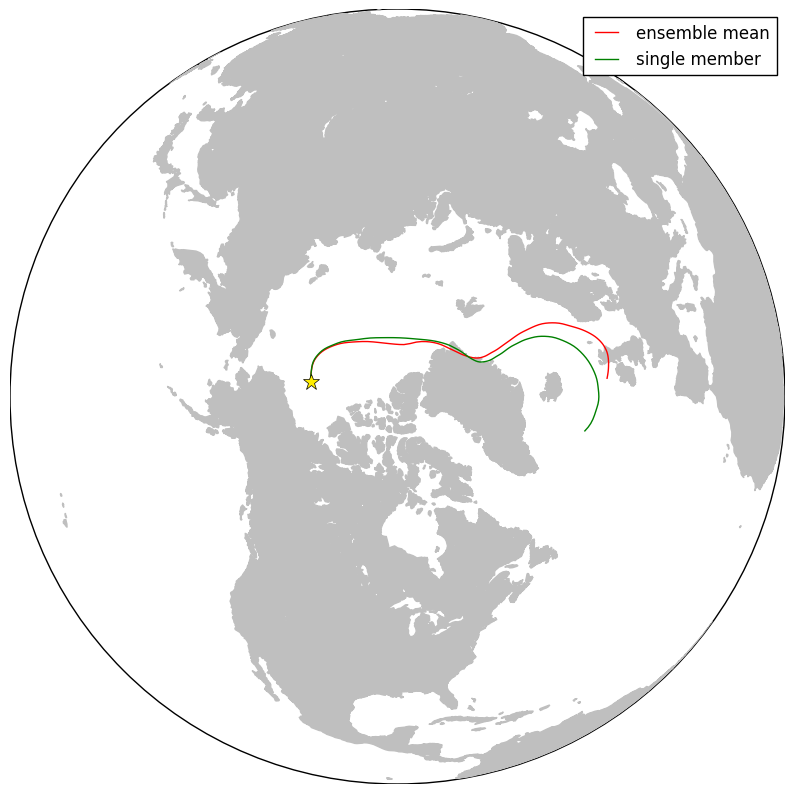

In [22]:
#title_1400 = "Ensemble mean vs original trajectory calculated by model"
trajplot_ensemble(lat1_1400_mean, lon1_1400_mean, lat2_1400, lon2_1400, sea_ice='n')

# 1850 Ensemble

In [23]:
file_name1850 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/ensemble_jan4_23_1850'

In [24]:
df3 = pd.read_csv(file_name1850, skiprows=32, header=None, delim_whitespace=True) 

cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}
# converting year to 4 digits
df3.iloc[:,2] = df3.iloc[:,2] + 1900


# df_subset is used to merge yy, mm, dd, hh values into BT_time column
df_subset = df3.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
dt_series = pd.to_datetime(df_subset)
dt_series.head()
# adding a new backtrajectory column
df3['BT_time'] = dt_series

# dropping the not required columns
df3.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
df3.head()
    
col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
df3.rename(columns=col_rename2, inplace=True)

del df_subset
del dt_series

In [25]:
# calculating mean trajectory from the ensemble members
df_mean_1850 = df3.groupby(df['back_hr']).mean()
df_mean_1850.head()

ensemble member  back_hr        Lat        Lon          AGL  \
back_hr                                                                
-119.2                14   -119.2  58.038370 -20.238333  1726.562963   
-118.2                14   -118.2  58.030741 -19.177926  1685.655556   
-117.2                14   -117.2  58.022407 -18.132333  1646.614815   
-116.2                14   -116.2  58.025926 -17.105037  1612.044444   
-115.2                14   -115.2  58.048593 -16.097963  1591.114815   

           Pressure  
back_hr              
-119.2   803.100000  
-118.2   807.159259  
-117.2   810.937037  
-116.2   814.170370  
-115.2   815.948148

In [26]:
# path to all trajectory files
file_1850= '/home/ollie/muali/Data/winter_all/tdump_1850_01_04_23'
df_1850 = pd.read_csv(file_1850, skiprows=7, header=None, delim_whitespace=True)
lat_1850 = np.array(df_1850.iloc[:, 9].copy())
lon_1850 = np.array(df_1850.iloc[:, 10].copy())

In [27]:
# lat1 is ensemble mean lats, lat2 is single traj lats
lat1_1850_mean=df_mean_1850['Lat'].values
lon1_1850_mean=df_mean_1850['Lon'].values

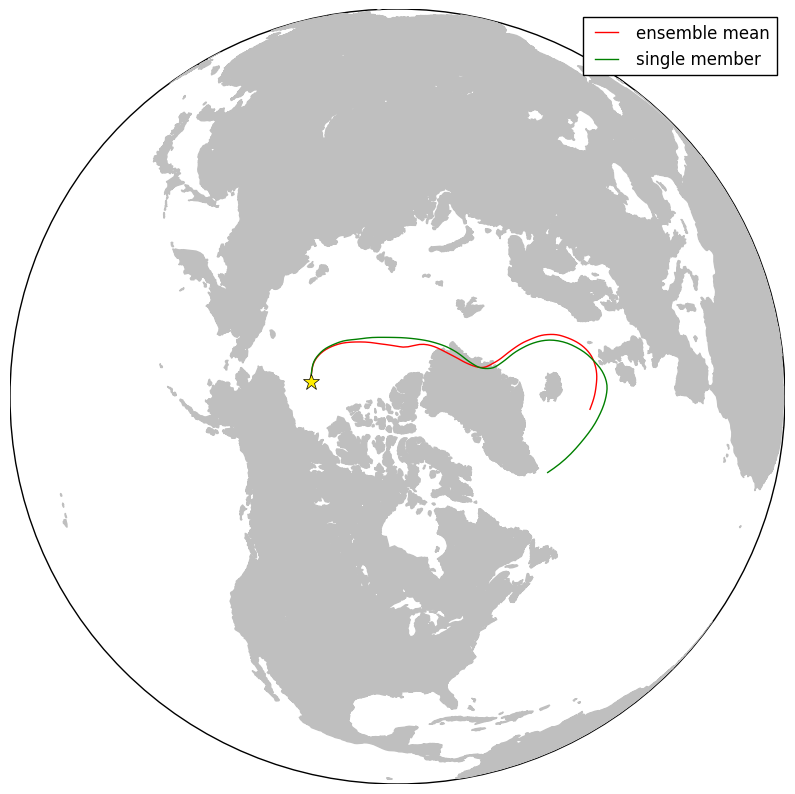

In [38]:
#title_1850 = "Ensemble mean vs original trajectory calculated by model for level 1850"
trajplot_ensemble(lat1_1850_mean, lon1_1850_mean, lat_1850, lon_1850, sea_ice='n')

# 780 m ensemble

In [29]:
file_name780 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/ensemble_jan4_23_780'

In [30]:
df3 = pd.read_csv(file_name780, skiprows=32, header=None, delim_whitespace=True) 

cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}
# converting year to 4 digits
df3.iloc[:,2] = df3.iloc[:,2] + 1900


# df_subset is used to merge yy, mm, dd, hh values into BT_time column
df_subset = df3.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
dt_series = pd.to_datetime(df_subset)
dt_series.head()
# adding a new backtrajectory column
df3['BT_time'] = dt_series

# dropping the not required columns
df3.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
df3.head()
    
col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
df3.rename(columns=col_rename2, inplace=True)

del df_subset
del dt_series

In [31]:
# calculating mean trajectory from the ensemble members
df_mean_780 = df3.groupby(df['back_hr']).mean()
df_mean_780.head()

ensemble member  back_hr        Lat        Lon          AGL  \
back_hr                                                                
-119.2                14   -119.2  68.368926  35.469926  1373.092593   
-118.2                14   -118.2  68.538963  36.077963  1368.433333   
-117.2                14   -117.2  68.716704  36.661630  1371.755556   
-116.2                14   -116.2  68.903667  37.215296  1378.322222   
-115.2                14   -115.2  69.099037  37.738556  1385.840741   

           Pressure  
back_hr              
-119.2   839.070370  
-118.2   841.377778  
-117.2   842.818519  
-116.2   843.644444  
-115.2   844.055556

In [32]:
# path to all trajectory files
file_780= '/home/ollie/muali/Data/winter_all/tdump_780_01_04_23'
df_780 = pd.read_csv(file_780, skiprows=7, header=None, delim_whitespace=True)
lat_780 = np.array(df_780.iloc[:, 9].copy())
lon_780 = np.array(df_780.iloc[:, 10].copy())

# lat1 is ensemble mean lats, lat2 is single traj lats
lat1_mean=df_mean_780['Lat'].values
lon1_mean=df_mean_780['Lon'].values

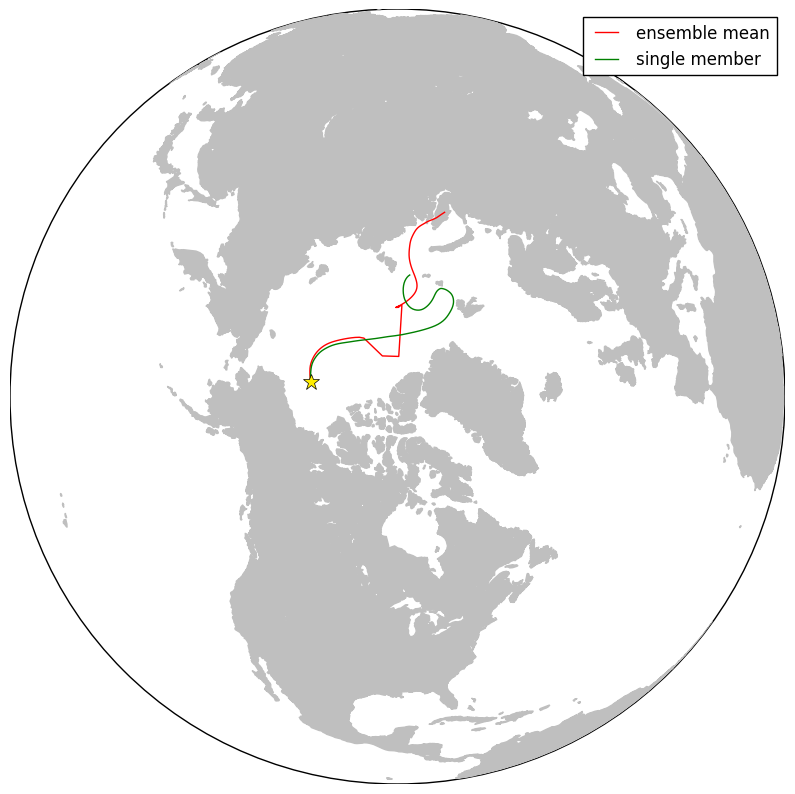

In [39]:
#title_1850 = "Ensemble mean vs original trajectory calculated by model for level 1850"
trajplot_ensemble(lat1_mean, lon1_mean, lat_780, lon_780, sea_ice='n')

# Ensemble 400m

In [34]:
file_name400 = '/home/ollie/muali/data_work/back_traj/Sounding/ensemble/ensemble_jan4_23_400'

In [35]:
df3 = pd.read_csv(file_name400, skiprows=32, header=None, delim_whitespace=True) 

cols_renames = {2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute'}
# converting year to 4 digits
df3.iloc[:,2] = df3.iloc[:,2] + 1900


# df_subset is used to merge yy, mm, dd, hh values into BT_time column
df_subset = df3.loc[:, list(cols_renames.keys())].rename(columns=cols_renames)
dt_series = pd.to_datetime(df_subset)
dt_series.head()
# adding a new backtrajectory column
df3['BT_time'] = dt_series

# dropping the not required columns
df3.drop([1,2,3,4,5,6,7], axis =1, inplace=True)
df3.head()
    
col_rename2 = {0:'ensemble member',8: 'back_hr', 9:'Lat', 10: 'Lon', 11:'AGL', 12:'Pressure'}
df3.rename(columns=col_rename2, inplace=True)

del df_subset
del dt_series

In [36]:
# calculating mean trajectory from the ensemble members
df_mean_400 = df3.groupby(df['back_hr']).mean()
df_mean_400.head()
# path to all trajectory files
file_400= '/home/ollie/muali/Data/winter_all/tdump_400_01_04_23'
df_400 = pd.read_csv(file_400, skiprows=7, header=None, delim_whitespace=True)
lat_400 = np.array(df_400.iloc[:, 9].copy())
lon_400 = np.array(df_400.iloc[:, 10].copy())

# lat1 is ensemble mean lats, lat2 is single traj lats
lat1_mean=df_mean_400['Lat'].values
lon1_mean=df_mean_400['Lon'].values

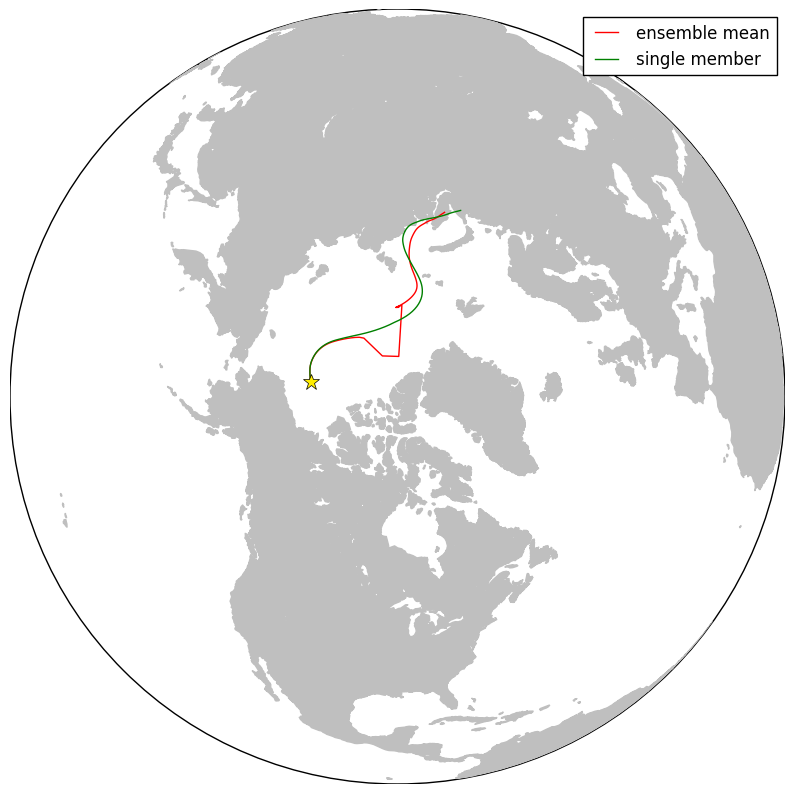

In [40]:
#title_1850 = "Ensemble mean vs original trajectory calculated by model for level 1850"
trajplot_ensemble(lat1_mean, lon1_mean, lat_400, lon_400, sea_ice='n')